In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset

combined_data = pd.merge(clinical_trial_data,mouse_drug_data, on=["Mouse ID","Mouse ID"], how="left")
# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vols_mean = combined_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_vols_mean = pd.DataFrame(tumor_vols_mean)

# Flatten the column headings
tumor_vols_mean = tumor_vols_mean.reset_index()

# Preview DataFrame
tumor_vols_mean

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vols_sem = combined_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_vols_sem = pd.DataFrame(tumor_vols_sem)
# Preview DataFrame

tumor_vols_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vols_mean = tumor_vols_mean.reset_index()
tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tumor_vols_sem = tumor_vols_sem.reset_index()
tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
tumor_vols_pivot_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
tumor_vols_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


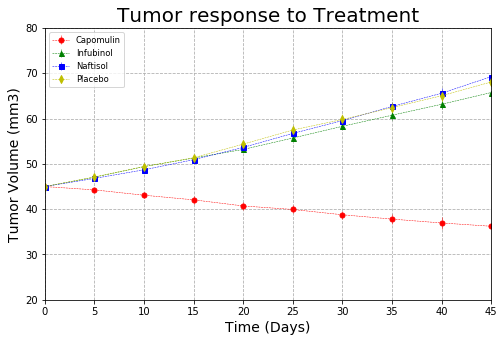

In [6]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (8, 5)),
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Capomulin"], yerr=tumor_vols_pivot_sem["Capomulin"], marker="o", color="r", markersize =5, linestyle="dashed", linewidth=0.5)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Infubinol"], yerr=tumor_vols_pivot_sem["Infubinol"], marker="^", color="g", markersize =5, linestyle="dashed", linewidth=0.5)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Naftisol"], yerr=tumor_vols_pivot_sem["Naftisol"], marker="s", color="b", markersize =5, linestyle="dashed", linewidth=0.5)
plt.errorbar(tumor_vols_pivot_mean.index, tumor_vols_pivot_mean["Placebo"], yerr=tumor_vols_pivot_sem["Placebo"], marker="d", color="y", markersize =5, linestyle="dashed", linewidth=0.5)

plt.title("Tumor response to Treatment", fontsize =20)
plt.xlabel("Time (Days)", fontsize = 14)
plt.ylabel("Tumor Volume (mm3)", fontsize =14)
plt.xlim(0,45)
plt.ylim(20,80)

plt.grid(linestyle="dashed")
plt.legend(['Capomulin','Infubinol','Naftisol','Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Fig1.png")


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = combined_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
df_met_sites_mean= pd.DataFrame(met_sites_mean)
# Preview DataFrame
df_met_sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = combined_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
df_met_sites_sem = pd.DataFrame(met_sites_sem)
# Preview DataFrame
df_met_sites_sem

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [9]:
# Minor Data Munging to Re-Format the Data Frames

df_met_sites_mean = df_met_sites_mean.reset_index()
df_met_sites_pivot_mean = df_met_sites_mean.pivot(index="Timepoint", columns ="Drug")["Metastatic Sites"]


df_met_sites_sem = df_met_sites_sem.reset_index()
df_met_sites_pivot_sem = df_met_sites_sem.pivot(index="Timepoint", columns ="Drug")["Metastatic Sites"]


# Preview that Reformatting worked
df_met_sites_pivot_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
df_met_sites_pivot_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


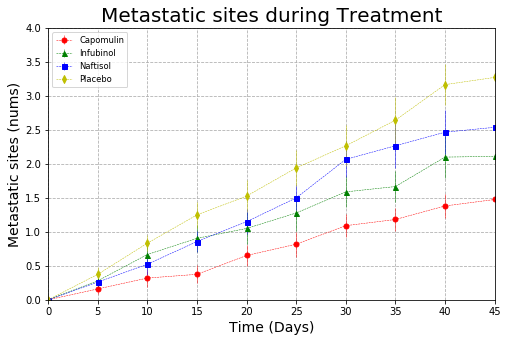

In [11]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (8, 5)),
plt.errorbar(df_met_sites_pivot_mean.index, df_met_sites_pivot_mean["Capomulin"], yerr=df_met_sites_pivot_sem["Capomulin"], marker="o", color="r", markersize =5, linestyle="dashed", linewidth=0.5)
plt.errorbar(df_met_sites_pivot_mean.index, df_met_sites_pivot_mean["Infubinol"], yerr=df_met_sites_pivot_sem["Infubinol"], marker="^", color="g", markersize =5, linestyle="dashed", linewidth=0.5)
plt.errorbar(df_met_sites_pivot_mean.index, df_met_sites_pivot_mean["Naftisol"], yerr=df_met_sites_pivot_sem["Naftisol"], marker="s", color="b", markersize =5, linestyle="dashed", linewidth=0.5)
plt.errorbar(df_met_sites_pivot_mean.index, df_met_sites_pivot_mean["Placebo"], yerr=df_met_sites_pivot_sem["Placebo"], marker="d", color="y", markersize =5, linestyle="dashed", linewidth=0.5)

plt.title("Metastatic sites during Treatment", fontsize =20)
plt.xlabel("Time (Days)", fontsize = 14)
plt.ylabel("Metastatic sites (nums)", fontsize =14)
plt.xlim(0,45)
plt.ylim(0,4)

plt.grid(linestyle="dashed")
plt.legend(['Capomulin','Infubinol','Naftisol','Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("Fig2.png")

# show the figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)




## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = combined_data.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
df_survival_count = pd.DataFrame({"Mouse Count": survival_count})
# Preview DataFrame
df_survival_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [13]:
# Minor Data Munging to Re-Format the Data Frames
df_survival_count = df_survival_count.reset_index()
df_survival_count_pivot = df_survival_count.pivot(index = "Timepoint", columns = "Drug")["Mouse Count"]



# Preview the Data Frame
df_survival_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


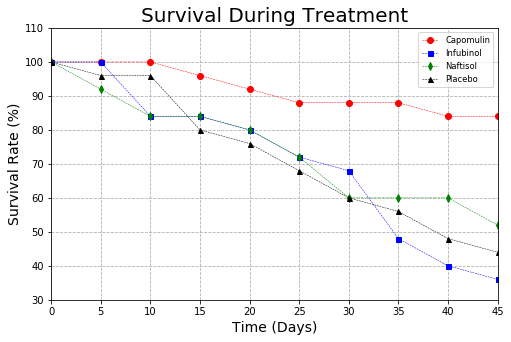

In [14]:
# Generate the Plot (Accounting for percentages)

plt.figure(figsize = (8,5))
plt.plot(100 * df_survival_count_pivot["Capomulin"] / 25, "ro", linestyle = "dashed", markersize = 6, linewidth =0.50)
plt.plot(100 * df_survival_count_pivot["Infubinol"] / 25, "bs", linestyle = "dashed", markersize = 5, linewidth =0.50)
plt.plot(100 * df_survival_count_pivot["Naftisol"] / 25, "gd", linestyle = "dashed", markersize = 5, linewidth =0.50)
plt.plot(100 * df_survival_count_pivot["Placebo"] / 25, "k^", linestyle = "dashed", markersize = 5, linewidth =0.50)

plt.ylim(30, 110)
plt.xlim(0, 45)

plt.title("Survival During Treatment", fontsize =20)
plt.xlabel("Time (Days)", fontsize = 14)
plt.ylabel("Survival Rate (%)", fontsize =14)
plt.grid(linestyle ="dashed")
plt.legend(['Capomulin','Infubinol','Naftisol','Placebo'],loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig("Fig3.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug

tumor_pct_changes = 100 * (tumor_vols_pivot_mean.iloc[-1] - tumor_vols_pivot_mean.iloc[0])/tumor_vols_pivot_mean.iloc[0]

# Display the data to confirm
tumor_pct_changes

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

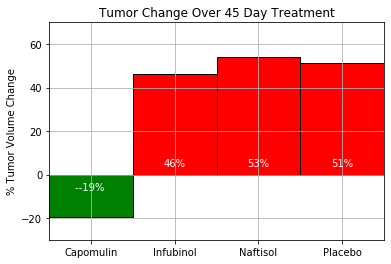

In [16]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_changes["Capomulin"],
tumor_pct_changes["Infubinol"],
tumor_pct_changes["Naftisol"],
tumor_pct_changes["Placebo"],
)

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width =1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color="green", ec = "black")
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color = "red", ec = "black")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_xticks(ind)
ax.set_xticklabels(('Capomulin','Infubinol','Naftisol','Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.set_xlim([-0.5,3.5])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white") 

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
plt.savefig("Fig4.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

# Pymaceuticals conclusions
1. Capomulin is an effective drug to reduce the tumor volume compared with other drugs with the treatment duration.
2. Capomulin has the least metastatic transfer sites in all the timepoint during the treatment compared with other drugs.
3. Capomulin treated mice have better survival rate compared with outher drugs, 84% of the mice survived in the 45 days for Capomulin treatment,compared to only 35-45% of mice on other treatment options.
